# Comparison between training with and without Adam optimizer 

## Import libreries and define global variables

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [2]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [3]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [4]:
test_frac = 1/4

In [5]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [6]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [7]:
preprocessing = 0

In [8]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [9]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.1,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 99,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### No optimizer

Build model

In [10]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training without Adam optimizer:

In [11]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 7.065e-01, val_loss: 6.753e-01; train_accuracy: 4.848e+01, val_accuracy: 6.800e+01  train_MSE: 2.565e-01, val_MSE: 2.409e-01  lr : 0.1
Epoch 1: train_loss: 7.026e-01, val_loss: 6.749e-01; train_accuracy: 5.051e+01, val_accuracy: 6.800e+01  train_MSE: 2.546e-01, val_MSE: 2.407e-01  lr : 0.1
Epoch 2: train_loss: 6.980e-01, val_loss: 6.747e-01; train_accuracy: 4.848e+01, val_accuracy: 6.400e+01  train_MSE: 2.524e-01, val_MSE: 2.407e-01  lr : 0.1
Epoch 3: train_loss: 6.932e-01, val_loss: 6.750e-01; train_accuracy: 5.051e+01, val_accuracy: 6.000e+01  train_MSE: 2.500e-01, val_MSE: 2.409e-01  lr : 0.1
Epoch 4: train_loss: 6.888e-01, val_loss: 6.759e-01; train_accuracy: 5.354e+01, val_accuracy: 6.000e+01  train_MSE: 2.479e-01, val_MSE: 2.414e-01  lr : 0.1
Epoch 5: train_loss: 6.850e-01, val_loss: 6.773e-01; train_accuracy: 5.657e+01, val_accuracy: 5.600e+01  train_MSE: 2.460e-01, val_MSE: 2.422e-01  lr : 0.1
Epoch 6: train_loss: 6.817e-01, val_loss: 6.787e-01; train_accur

Epoch 27: train_loss: 5.418e-01, val_loss: 5.463e-01; train_accuracy: 7.879e+01, val_accuracy: 9.200e+01  train_MSE: 1.781e-01, val_MSE: 1.779e-01  lr : 0.1
Epoch 28: train_loss: 5.312e-01, val_loss: 5.345e-01; train_accuracy: 7.879e+01, val_accuracy: 9.200e+01  train_MSE: 1.737e-01, val_MSE: 1.723e-01  lr : 0.1
Epoch 29: train_loss: 5.206e-01, val_loss: 5.224e-01; train_accuracy: 7.879e+01, val_accuracy: 9.200e+01  train_MSE: 1.694e-01, val_MSE: 1.666e-01  lr : 0.1
Epoch 30: train_loss: 5.103e-01, val_loss: 5.100e-01; train_accuracy: 7.980e+01, val_accuracy: 9.200e+01  train_MSE: 1.654e-01, val_MSE: 1.610e-01  lr : 0.1
Epoch 31: train_loss: 5.003e-01, val_loss: 4.975e-01; train_accuracy: 7.980e+01, val_accuracy: 9.200e+01  train_MSE: 1.615e-01, val_MSE: 1.555e-01  lr : 0.1
Epoch 32: train_loss: 4.906e-01, val_loss: 4.851e-01; train_accuracy: 7.980e+01, val_accuracy: 9.200e+01  train_MSE: 1.580e-01, val_MSE: 1.501e-01  lr : 0.1
Epoch 33: train_loss: 4.815e-01, val_loss: 4.731e-01; trai

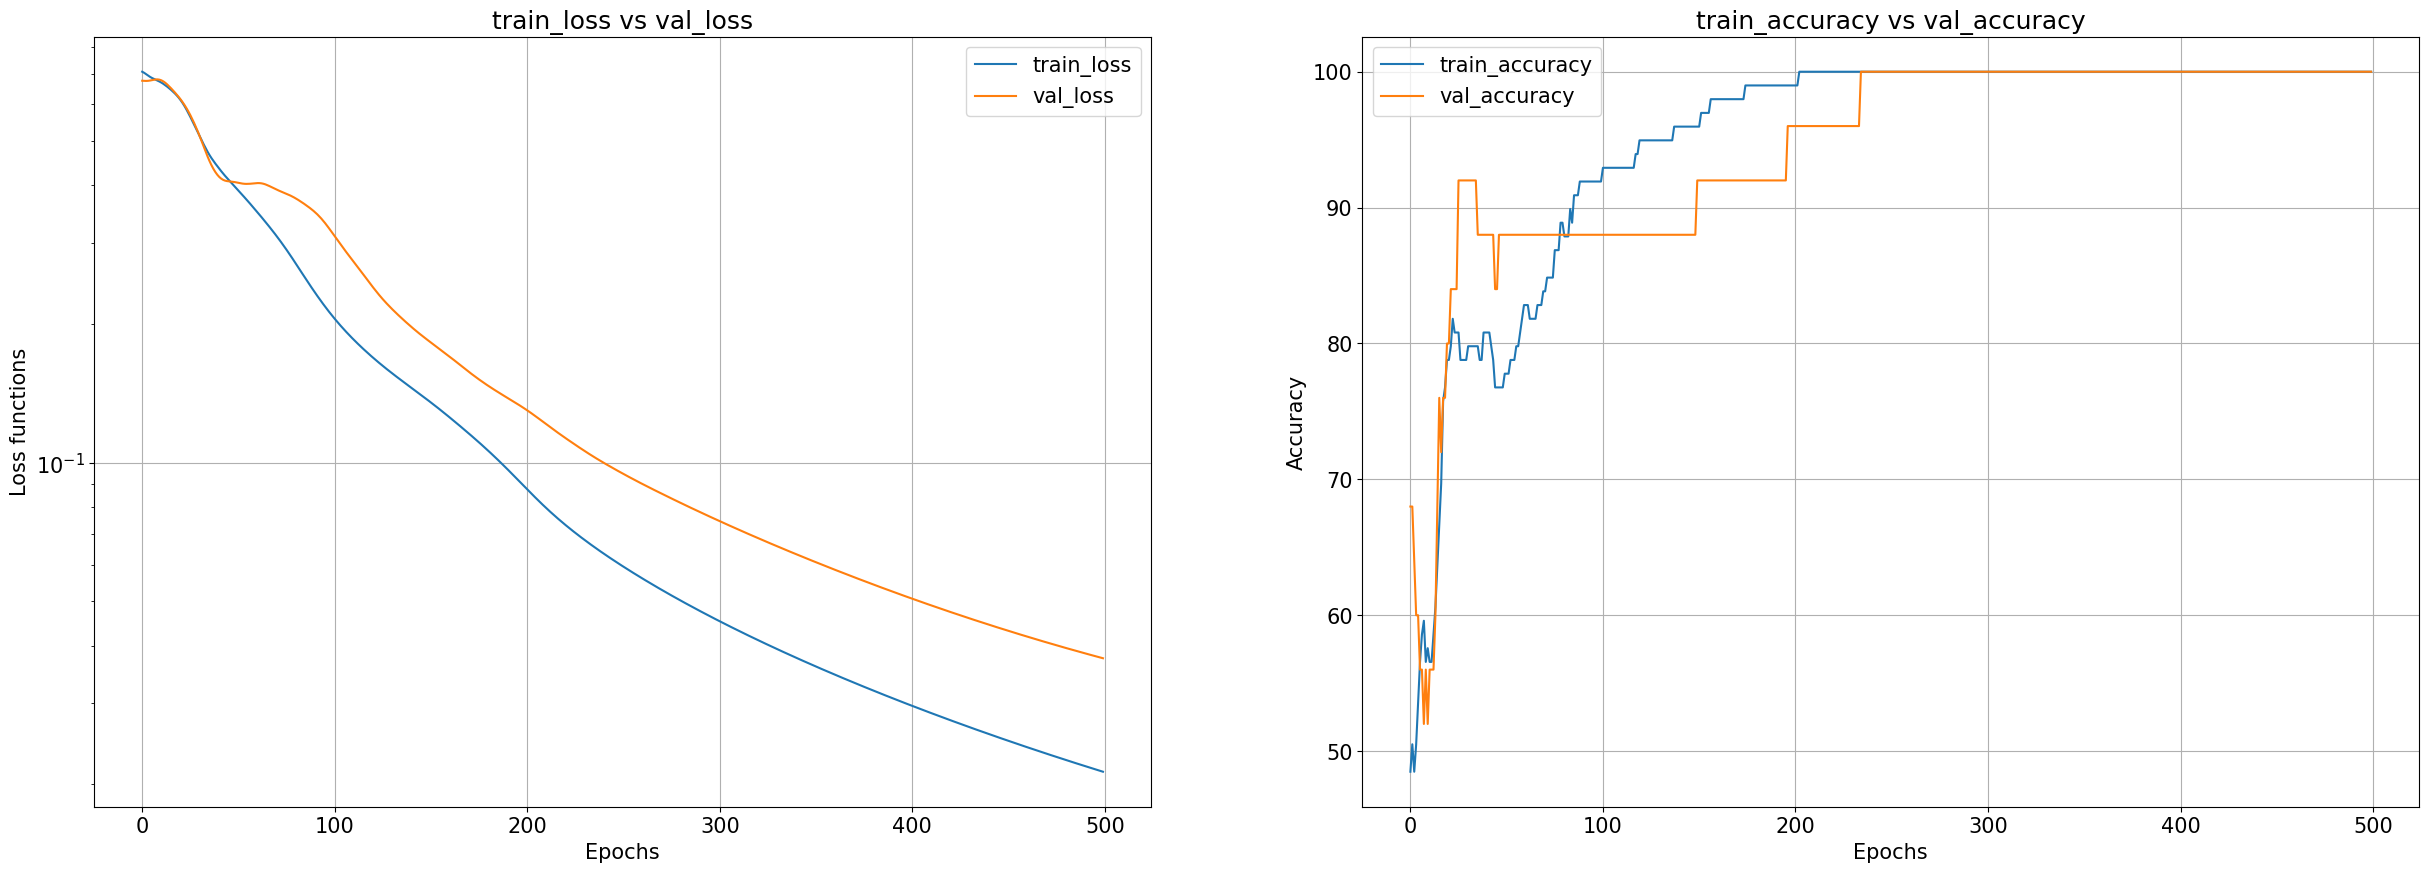

In [12]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'],label='train_accuracy')
plt.plot(history_noopt['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [13]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with Adam optimizer:


In [14]:
np.random.seed(seed)
params['use_opt'] = 1
history_opt = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.680e-01, val_loss: 6.864e-01; train_accuracy: 5.657e+01, val_accuracy: 4.800e+01  train_MSE: 2.377e-01, val_MSE: 2.469e-01  lr : 0.1
Epoch 1: train_loss: 6.353e-01, val_loss: 6.546e-01; train_accuracy: 6.667e+01, val_accuracy: 6.400e+01  train_MSE: 2.216e-01, val_MSE: 2.310e-01  lr : 0.1
Epoch 2: train_loss: 5.978e-01, val_loss: 6.070e-01; train_accuracy: 7.677e+01, val_accuracy: 8.400e+01  train_MSE: 2.032e-01, val_MSE: 2.072e-01  lr : 0.1
Epoch 3: train_loss: 5.597e-01, val_loss: 5.599e-01; train_accuracy: 7.980e+01, val_accuracy: 8.400e+01  train_MSE: 1.857e-01, val_MSE: 1.847e-01  lr : 0.1
Epoch 4: train_loss: 5.233e-01, val_loss: 5.167e-01; train_accuracy: 8.081e+01, val_accuracy: 8.800e+01  train_MSE: 1.704e-01, val_MSE: 1.654e-01  lr : 0.1
Epoch 5: train_loss: 4.938e-01, val_loss: 4.817e-01; train_accuracy: 7.778e+01, val_accuracy: 8.400e+01  train_MSE: 1.596e-01, val_MSE: 1.514e-01  lr : 0.1
Epoch 6: train_loss: 4.699e-01, val_loss: 4.537e-01; train_accur

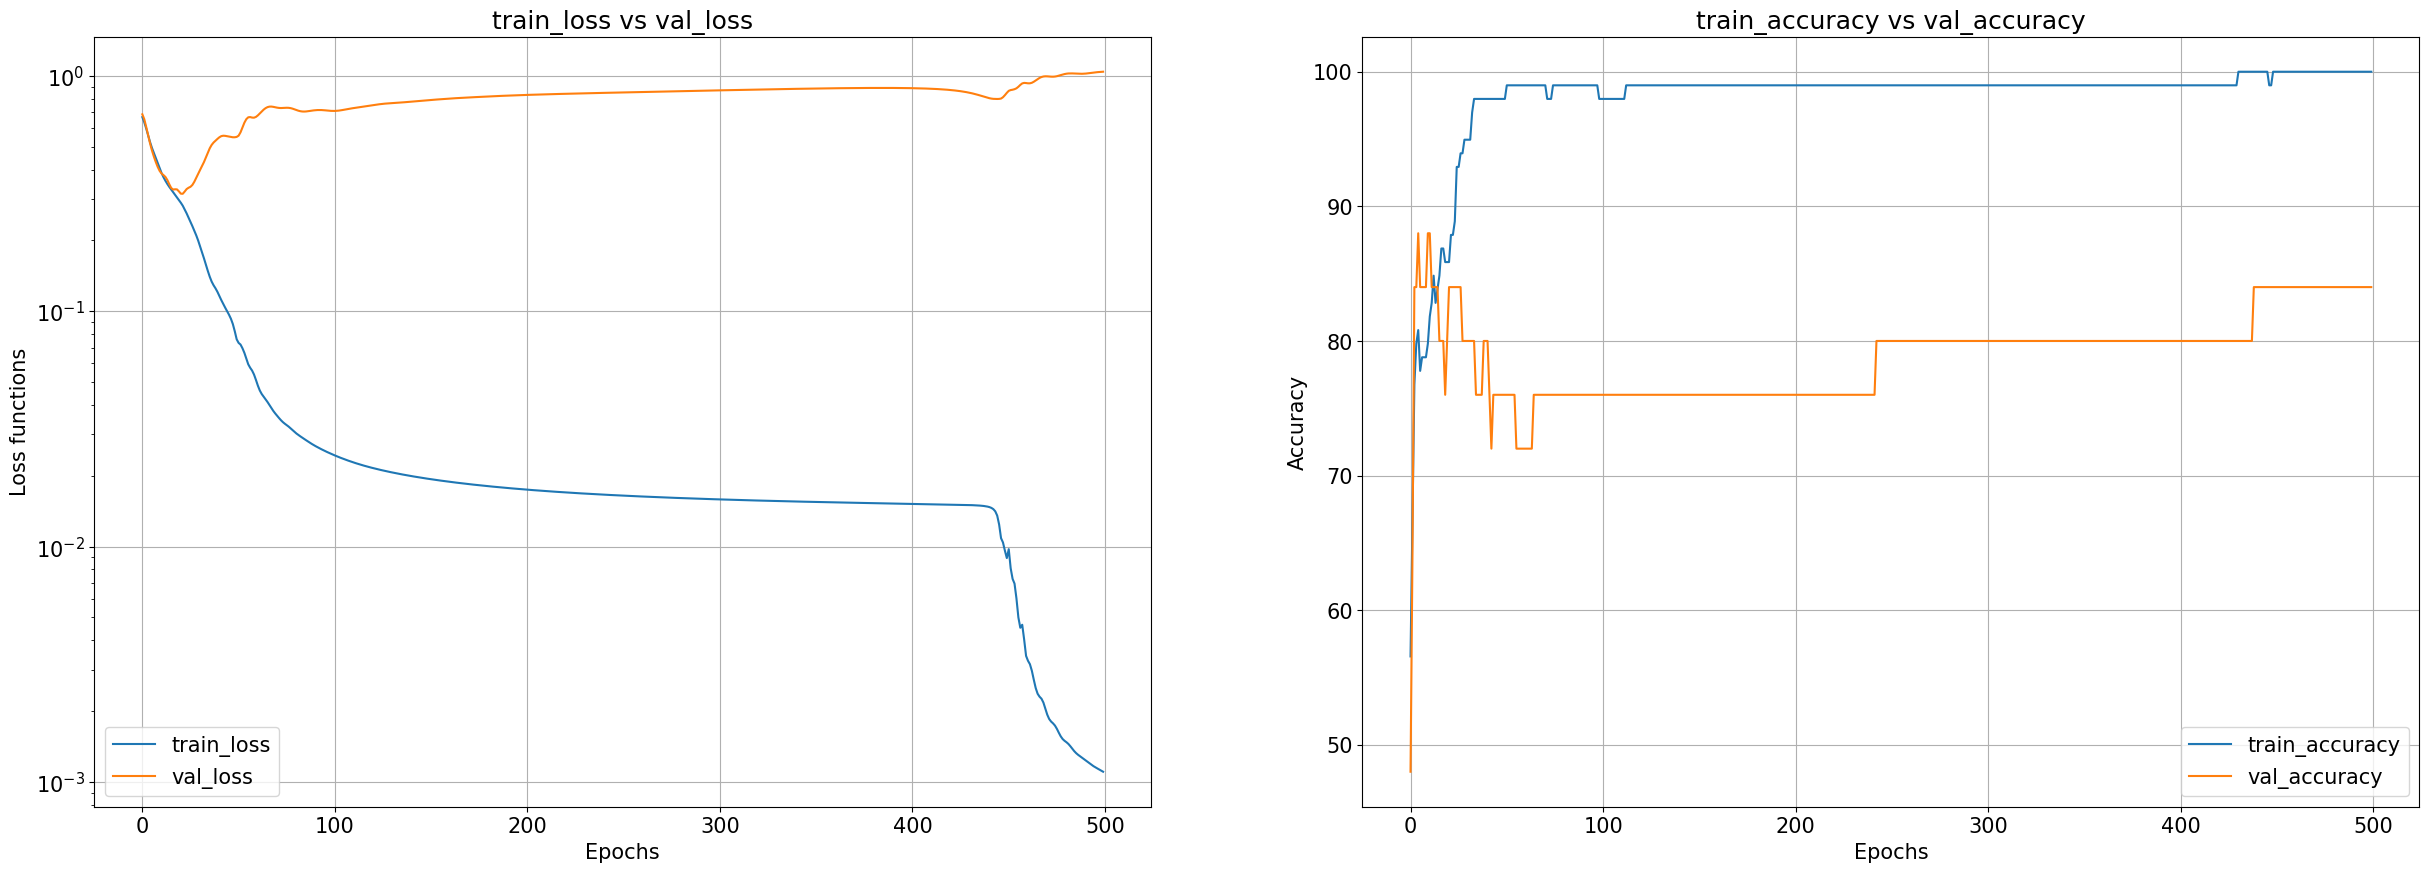

In [15]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_accuracy'],label='train_accuracy')
plt.plot(history_opt['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

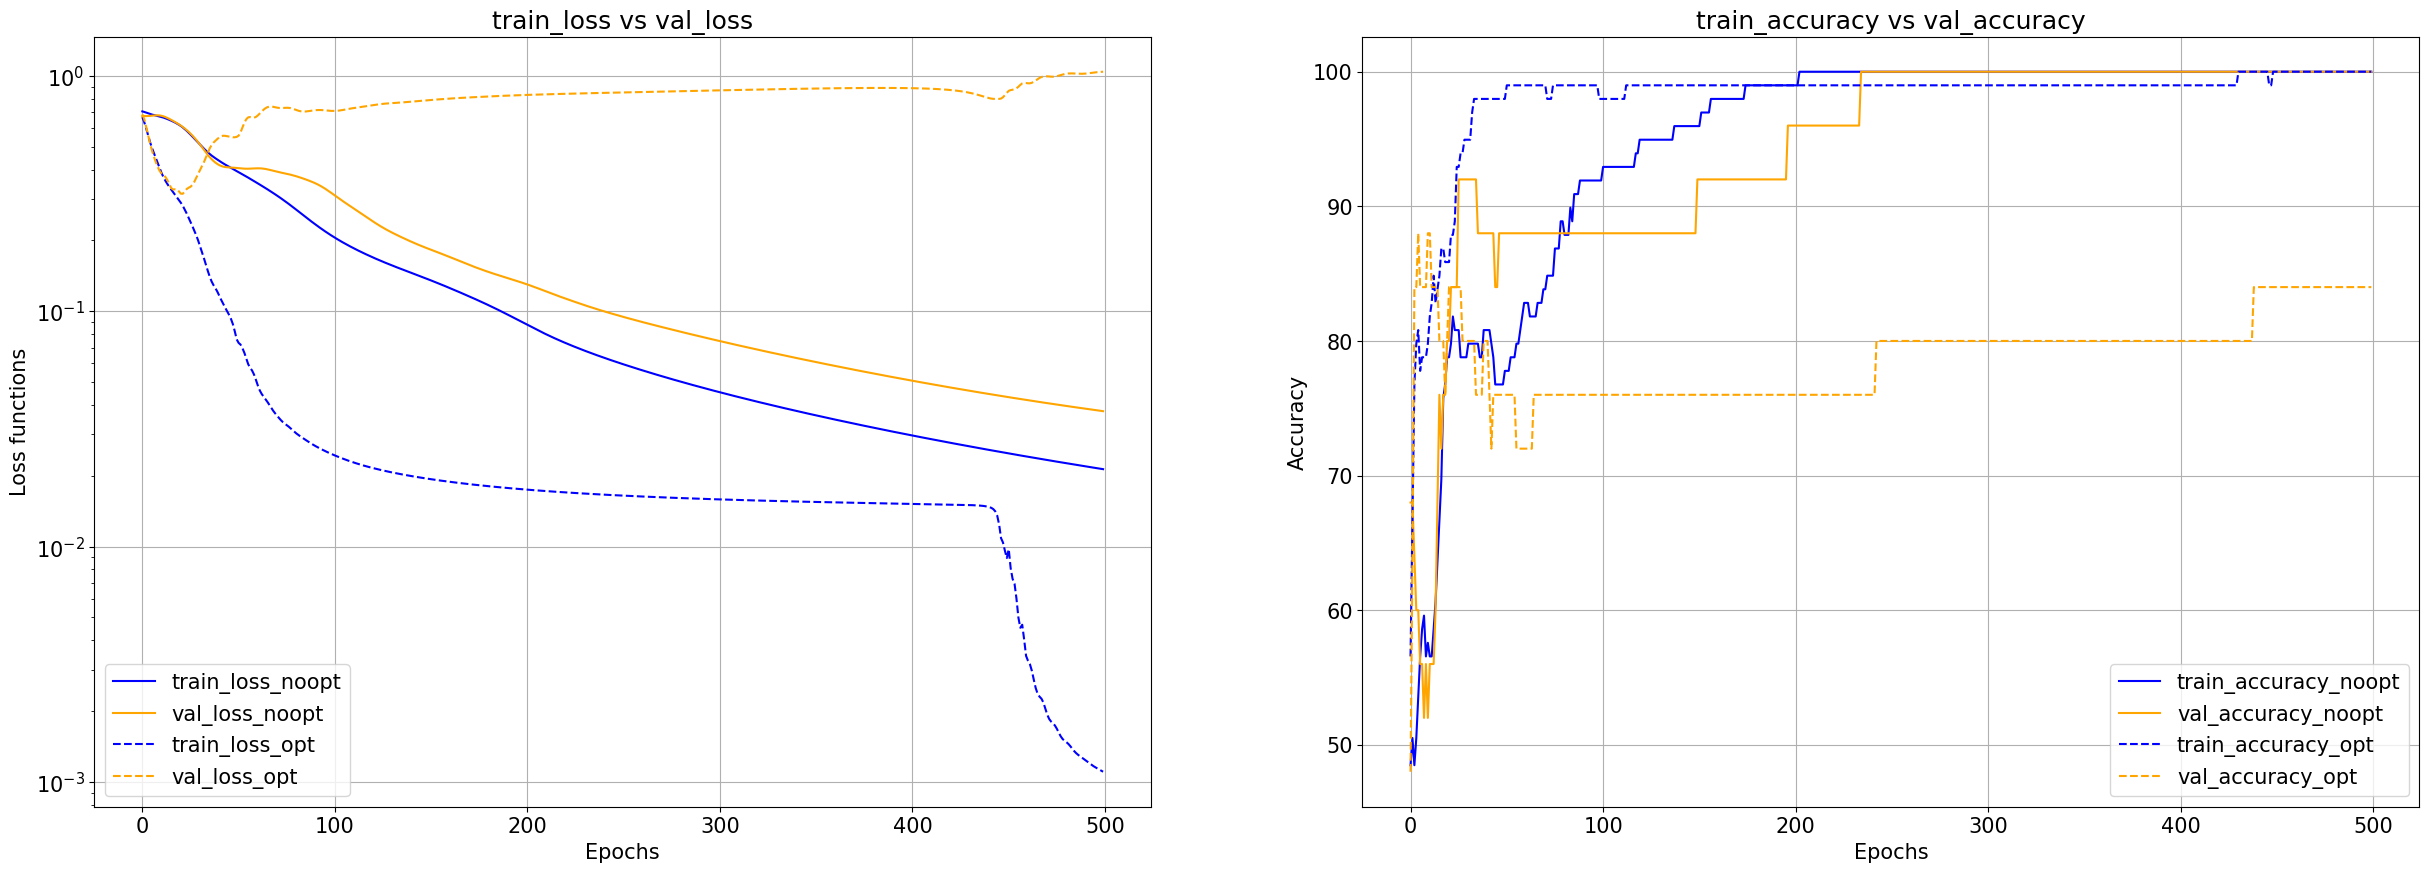

In [16]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['val_loss'], '-', label='val_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['val_loss'], '--', label='val_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'], '-',label='train_accuracy_noopt', color='blue')
plt.plot(history_noopt['val_accuracy'], '-', label='val_accuracy_noopt', color='orange')
plt.plot(history_opt['train_accuracy'], '--', label='train_accuracy_opt', color='blue')
plt.plot(history_opt['val_accuracy'], '--', label='val_accuracy_opt', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [43]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.001,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

seed = np.random.randint(10,1000)

### No optimizer

Build model

In [44]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_initial_weights_list()

Training without Adam optimizer:

In [45]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.627e+02, val_loss: 6.112e+02; train_MEE: 3.898e+01, val_MEE: 3.787e+01  lr : 0.001
Epoch 1: train_loss: 3.767e+02, val_loss: 3.439e+02; train_MEE: 2.832e+01, val_MEE: 2.743e+01  lr : 0.001
Epoch 2: train_loss: 1.567e+02, val_loss: 1.394e+02; train_MEE: 1.831e+01, val_MEE: 1.747e+01  lr : 0.001
Epoch 3: train_loss: 6.069e+01, val_loss: 6.000e+01; train_MEE: 1.167e+01, val_MEE: 1.183e+01  lr : 0.001
Epoch 4: train_loss: 3.965e+01, val_loss: 4.703e+01; train_MEE: 9.759e+00, val_MEE: 1.059e+01  lr : 0.001
Epoch 5: train_loss: 3.280e+01, val_loss: 3.966e+01; train_MEE: 8.908e+00, val_MEE: 9.674e+00  lr : 0.001
Epoch 6: train_loss: 2.701e+01, val_loss: 3.253e+01; train_MEE: 8.057e+00, val_MEE: 8.700e+00  lr : 0.001
Epoch 7: train_loss: 2.122e+01, val_loss: 2.723e+01; train_MEE: 7.037e+00, val_MEE: 7.884e+00  lr : 0.001
Epoch 8: train_loss: 1.619e+01, val_loss: 2.155e+01; train_MEE: 5.989e+00, val_MEE: 6.831e+00  lr : 0.001
Epoch 9: train_loss: 1.302e+01, val_loss: 1.78

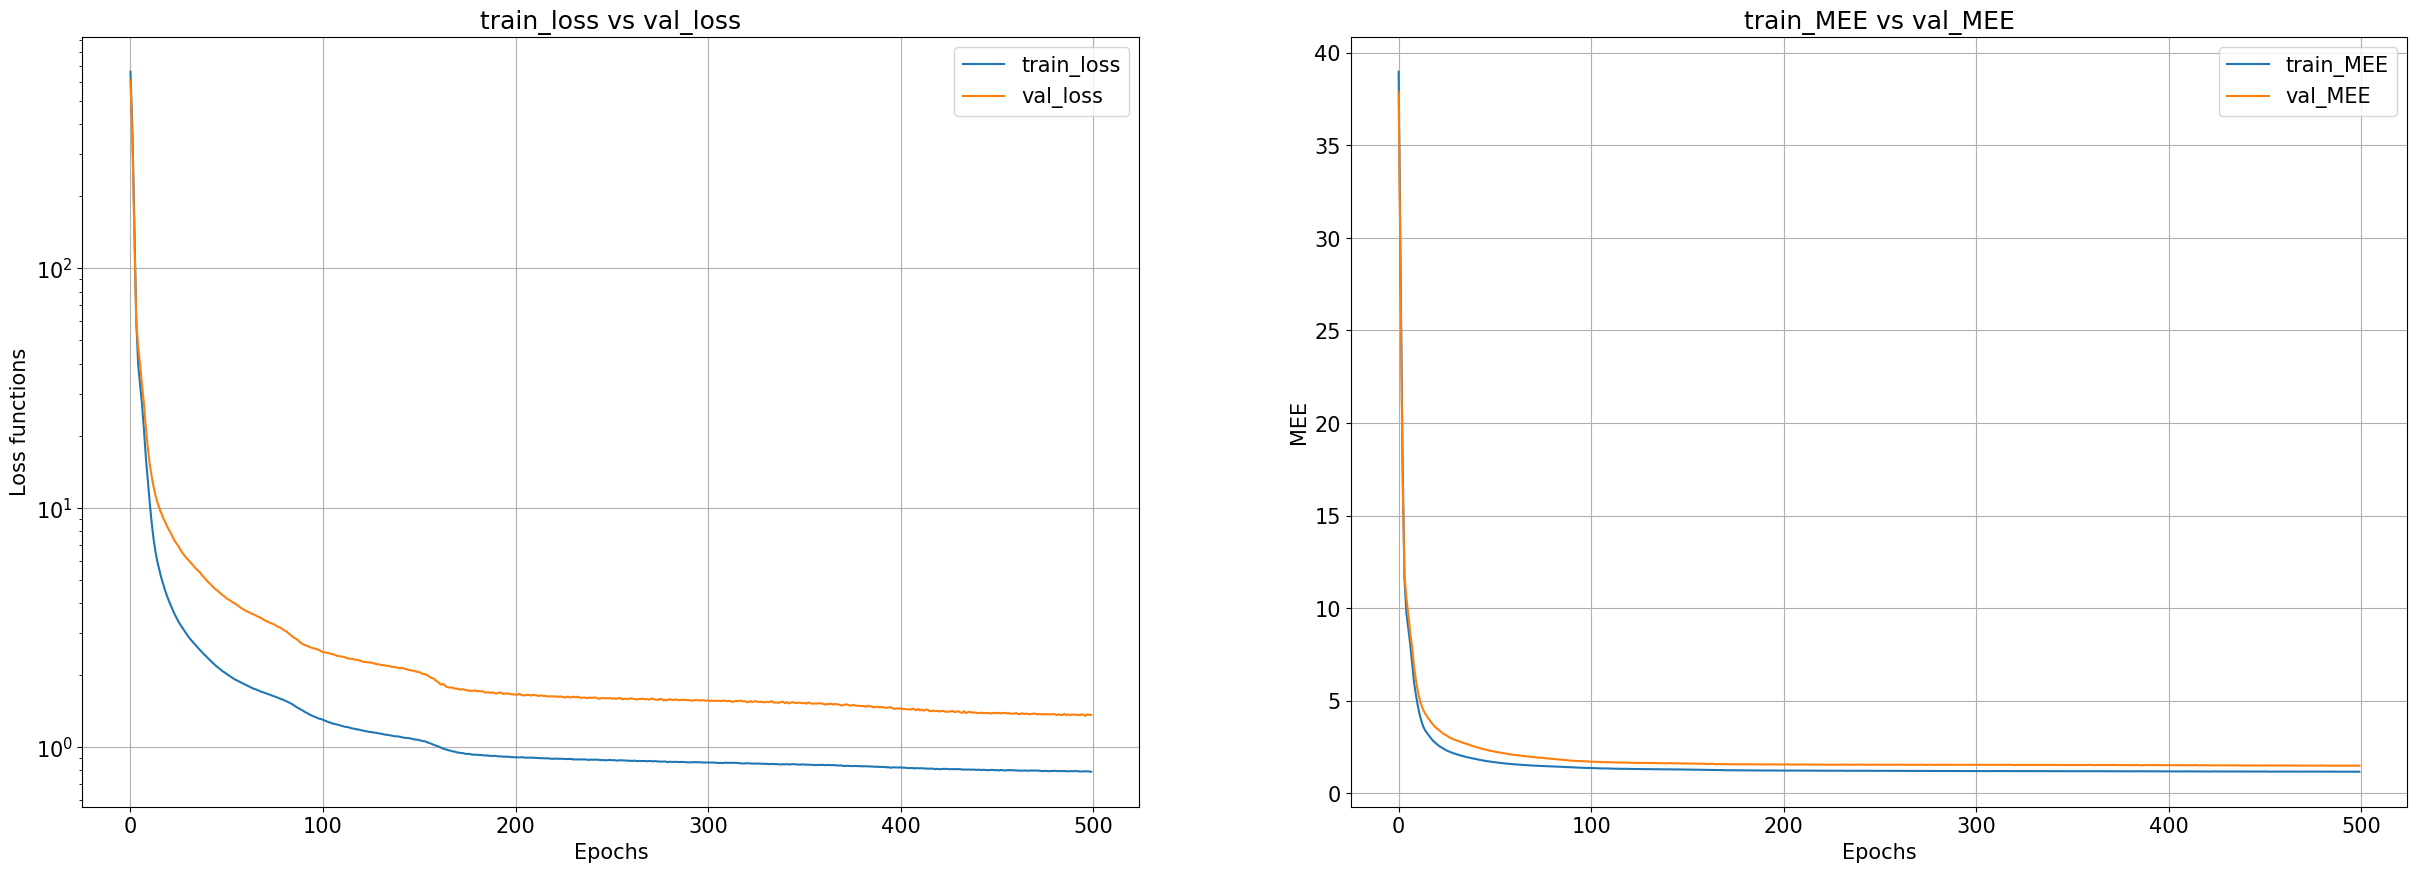

In [46]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'],label='train_MEE')
plt.plot(history_noopt['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [68]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with Adam optimizer:


In [69]:
np.random.seed(seed)
params['use_opt'] = 1
params['eta'] = 0.005
history_opt = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 7.511e+02, val_loss: 6.946e+02; train_MEE: 4.185e+01, val_MEE: 4.067e+01  lr : 0.005
Epoch 1: train_loss: 6.824e+02, val_loss: 6.327e+02; train_MEE: 3.963e+01, val_MEE: 3.857e+01  lr : 0.005
Epoch 2: train_loss: 6.302e+02, val_loss: 5.851e+02; train_MEE: 3.786e+01, val_MEE: 3.691e+01  lr : 0.005
Epoch 3: train_loss: 5.870e+02, val_loss: 5.457e+02; train_MEE: 3.635e+01, val_MEE: 3.548e+01  lr : 0.005
Epoch 4: train_loss: 5.489e+02, val_loss: 5.104e+02; train_MEE: 3.497e+01, val_MEE: 3.415e+01  lr : 0.005
Epoch 5: train_loss: 5.134e+02, val_loss: 4.778e+02; train_MEE: 3.363e+01, val_MEE: 3.287e+01  lr : 0.005
Epoch 6: train_loss: 4.833e+02, val_loss: 4.483e+02; train_MEE: 3.241e+01, val_MEE: 3.166e+01  lr : 0.005
Epoch 7: train_loss: 4.574e+02, val_loss: 4.227e+02; train_MEE: 3.132e+01, val_MEE: 3.058e+01  lr : 0.005
Epoch 8: train_loss: 4.340e+02, val_loss: 4.004e+02; train_MEE: 3.035e+01, val_MEE: 2.962e+01  lr : 0.005
Epoch 9: train_loss: 4.128e+02, val_loss: 3.80

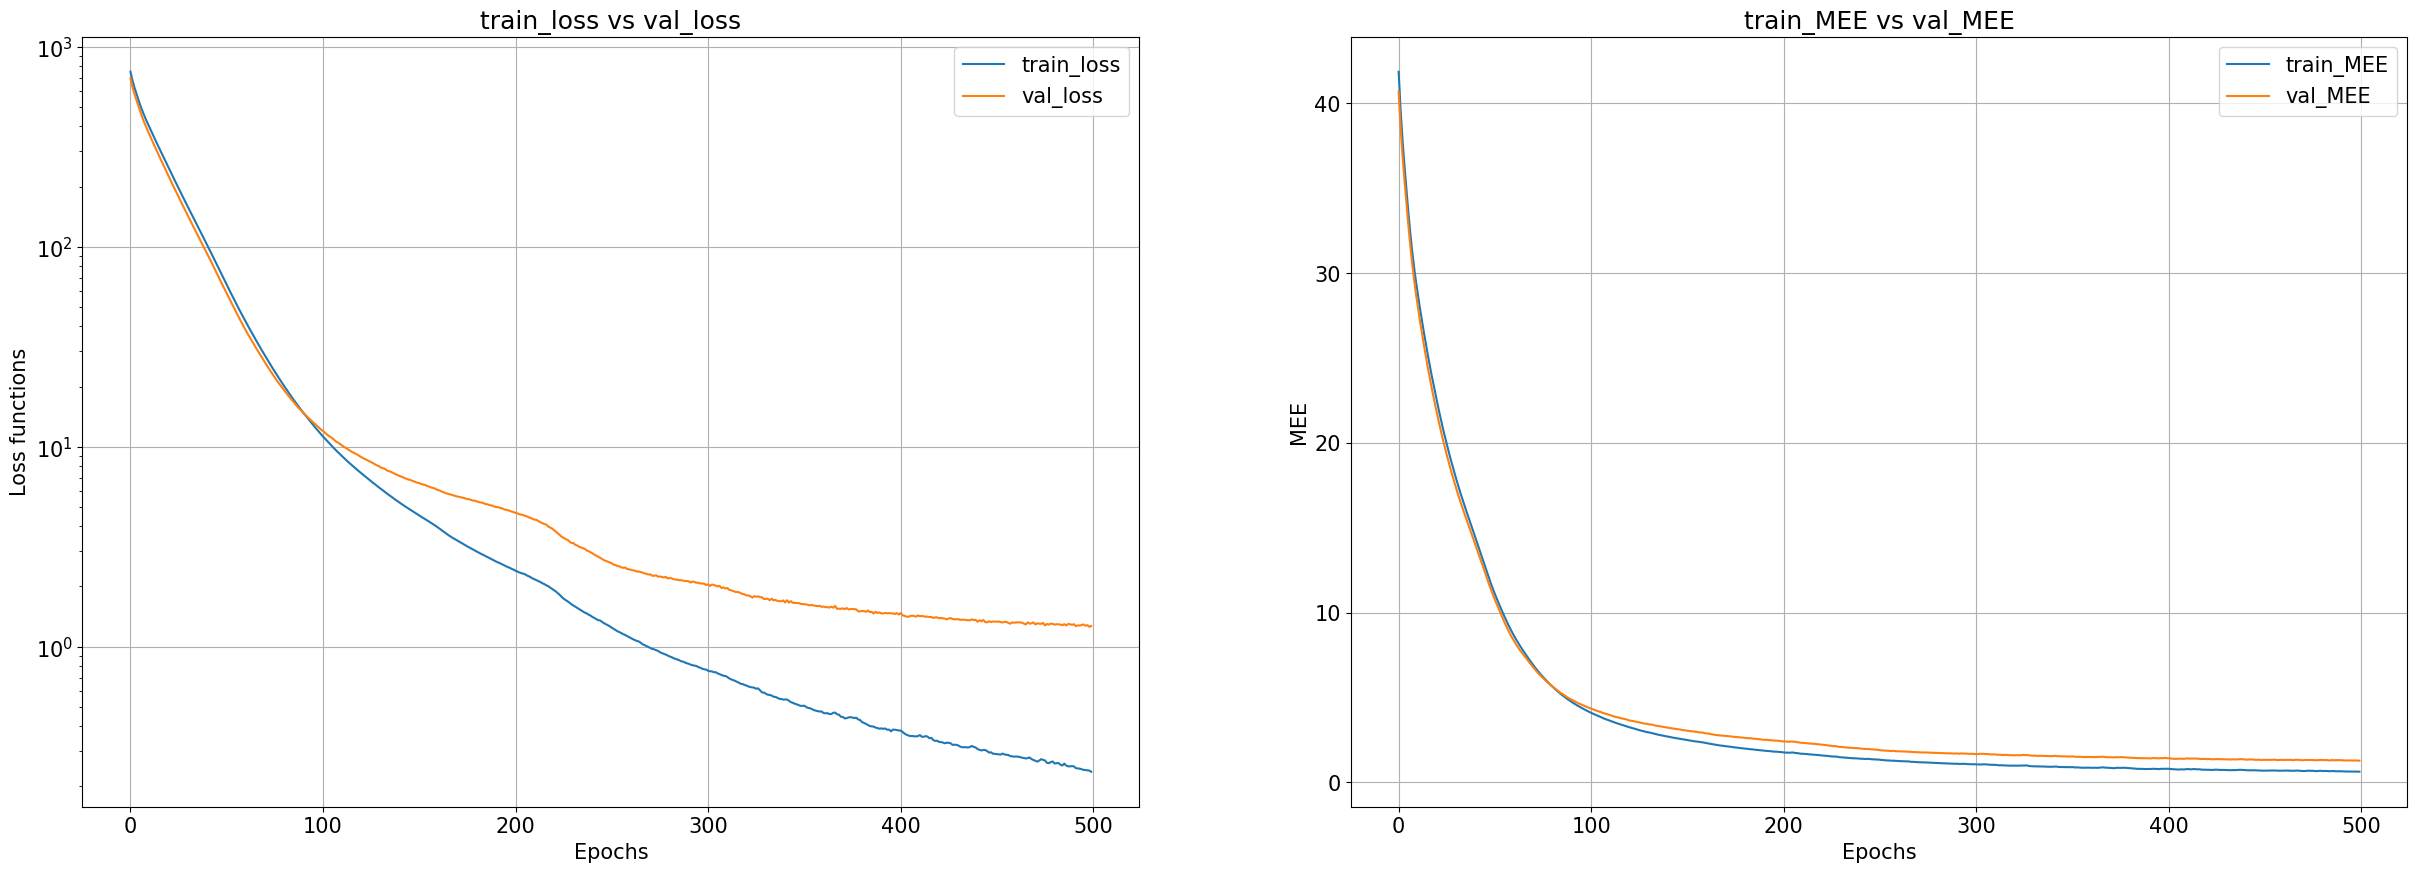

In [70]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_MEE'],label='train_MEE')
plt.plot(history_opt['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

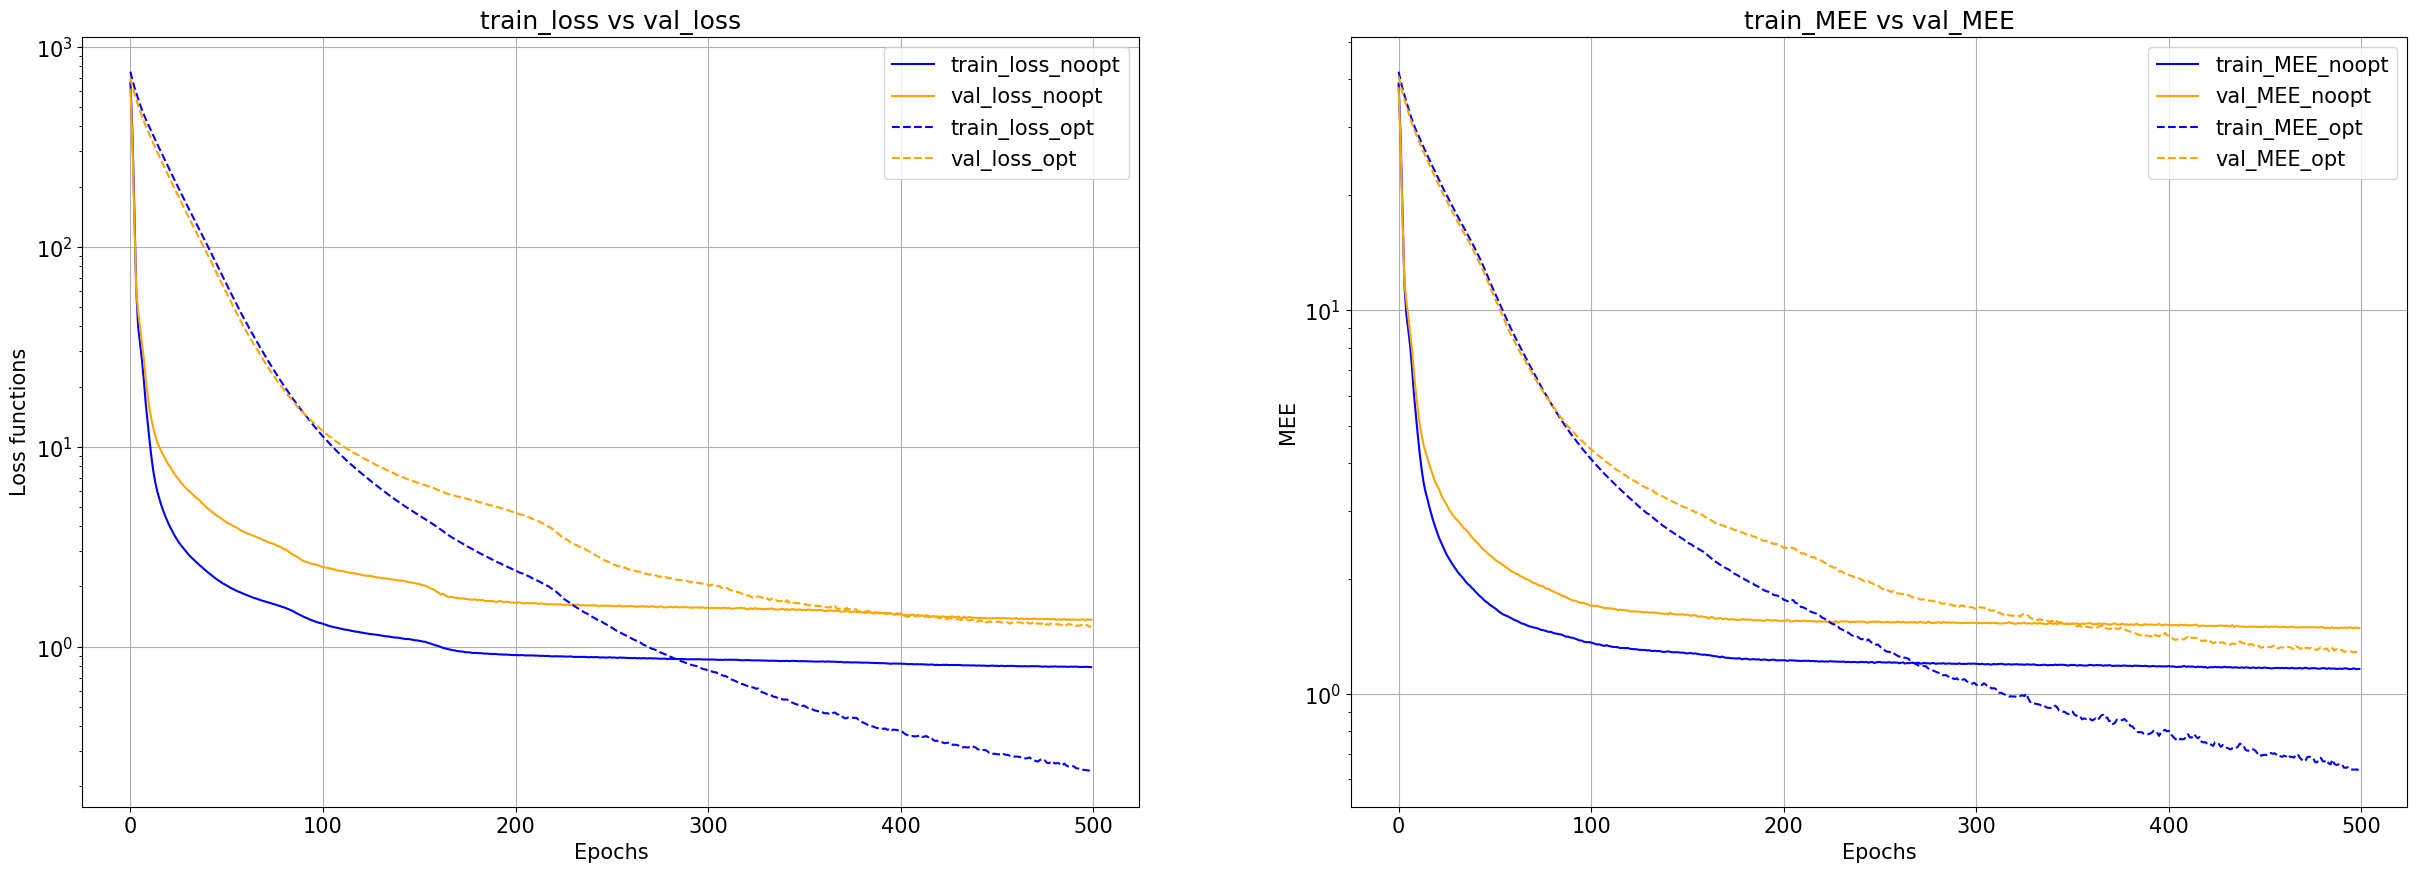

In [71]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['val_loss'], '-', label='val_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['val_loss'], '--', label='val_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'], '-',label='train_MEE_noopt', color='blue')
plt.plot(history_noopt['val_MEE'], '-', label='val_MEE_noopt', color='orange')
plt.plot(history_opt['train_MEE'], '--', label='train_MEE_opt', color='blue')
plt.plot(history_opt['val_MEE'], '--', label='val_MEE_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)